In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-06_11:56:40.csv')
catalog.shape

(2692201, 17)

In [6]:
catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

In [7]:
kids_x_sdss_north = kids_x_sdss.loc[kids_x_sdss['DECJ2000'] > -15]
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]

In [8]:
qso_kids_sdss = kids_x_sdss_north.loc[kids_x_sdss_north['CLASS'] == 'QSO']
qso_catalog = catalog_north.loc[catalog_north['CLASS'] == 'QSO']

In [9]:
star_kids_sdss = kids_x_sdss_north.loc[kids_x_sdss_north['CLASS'] == 'STAR']
star_catalog = catalog_north.loc[catalog_north['CLASS'] == 'STAR']

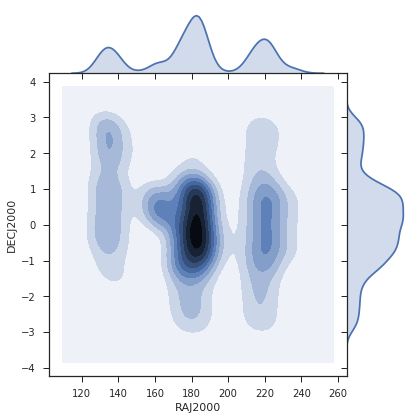

In [20]:
sns.jointplot(x=star_kids_sdss['RAJ2000'], y=star_kids_sdss['DECJ2000'], kind='kde', stat_func=None, space=0)

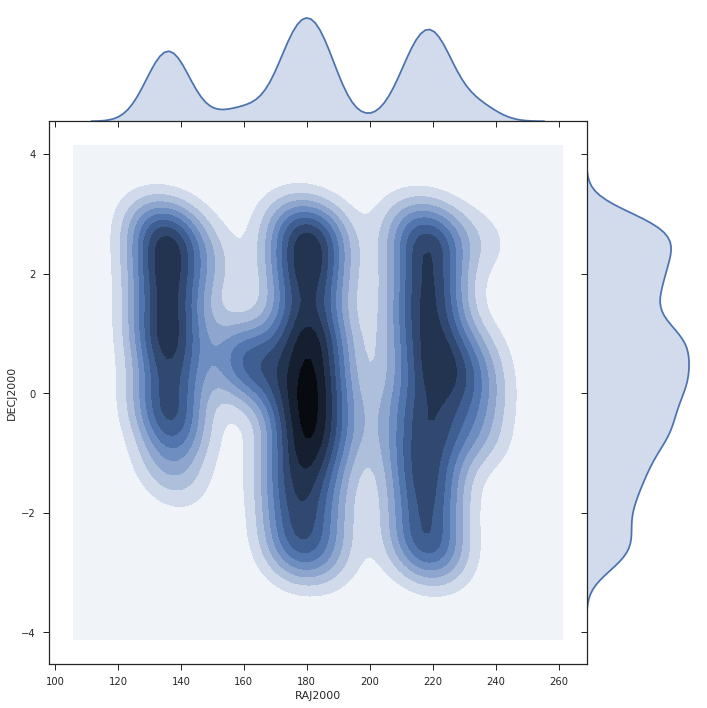

In [32]:
sns.jointplot(x=qso_kids_sdss['RAJ2000'], y=qso_kids_sdss['DECJ2000'], kind='kde', stat_func=None, size=10, space=0)

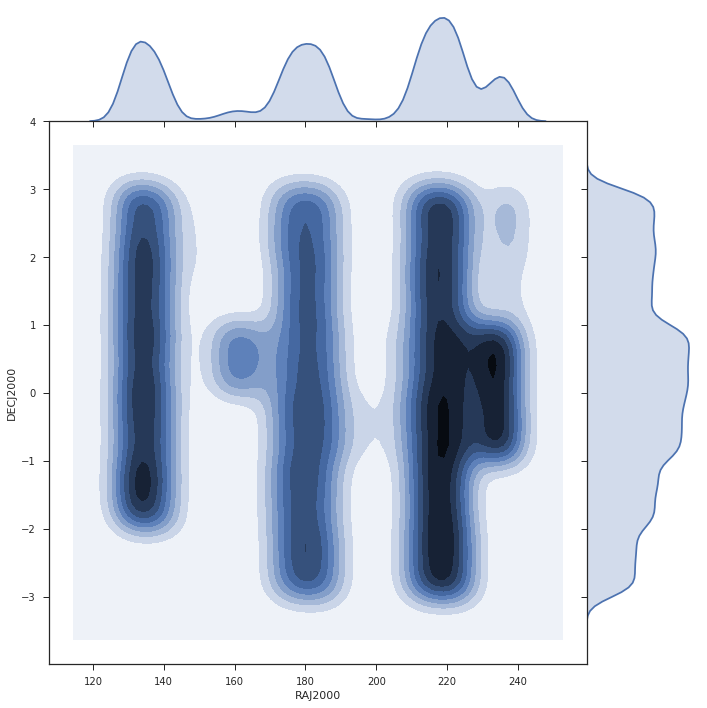

In [31]:
star_catalog_sampled = star_catalog.sample(200000)
sns.jointplot(x=star_catalog_sampled['RAJ2000'], y=star_catalog_sampled['DECJ2000'], kind='kde', stat_func=None, size=10, space=0)

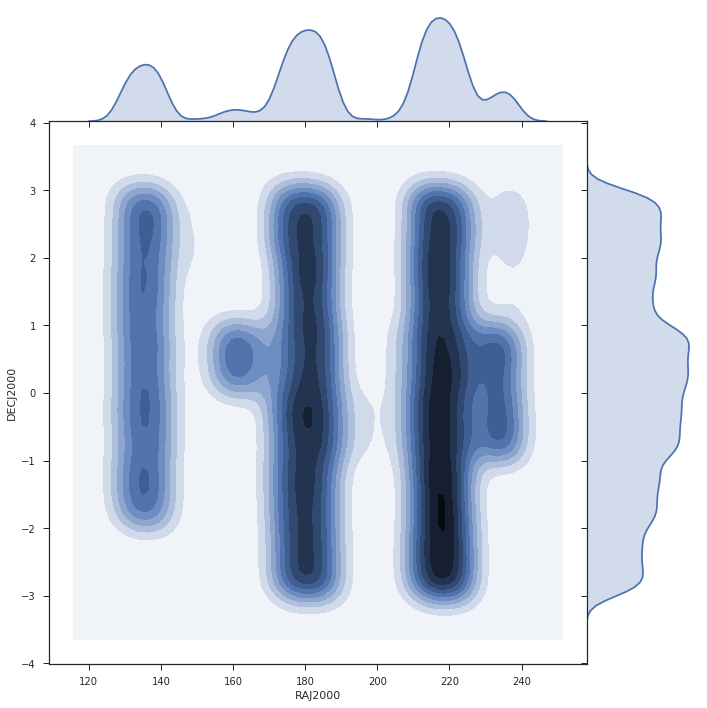

In [29]:
sns.jointplot(x=qso_catalog['RAJ2000'], y=qso_catalog['DECJ2000'], kind='kde', stat_func=None, size=10, space=0)